# Differentiation Using Pytorch

Author: Muhammed Ashrah

Source Adapted From: Dive into Deep Learning (d2.ail)

📝 This notebook is adapted from the "Automatic Differentiation" section of the Dive into Deep Learning book.

This notebook provides a beginner-friendly walkthrough of differentiation concepts using PyTorch.

> 💡 The goal is not just to run the code, but to understand what’s happening behind the scenes.

Feel free to tweak the examples and experiment!



In [ ]:
import torch

# Calculating differentiation of a simple function when given input input is scalar

In [ ]:
x=torch.arange(6,dtype=float,requires_grad=True) # This requires_grad helps us to calculate gradient
x

tensor([0., 1., 2., 3., 4., 5.], dtype=torch.float64, requires_grad=True)

We have to find the gradient of : 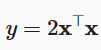


In [ ]:
# Let us begin by finding y using 2 * dot product of (x,x)
y=2*torch.dot(x,x)
y

tensor(110., dtype=torch.float64, grad_fn=<MulBackward0>)

In [ ]:
# Let us now find the derivative . For this , first you have to do y.backward()
# This is the step in which dy/dx is being calculated
y.backward()

In [ ]:
# We are applying exact value of x into dy/dx in this step
x.grad # We know that dy/dx will be 4*x, so the values must just be x vector with 4 multiplied to each element

tensor([ 0.,  4.,  8., 12., 16., 20.], dtype=torch.float64)

PyTorch does not automatically reset the gradient buffer when we record a new gradient. Instead, the new gradient is added to the already-stored gradient

In [ ]:
# To reset
x.grad.zero_()

tensor([0., 0., 0., 0., 0., 0.], dtype=torch.float64)

In [ ]:
y=x.sum()
y

tensor(15., dtype=torch.float64, grad_fn=<SumBackward0>)

In [ ]:
# Let us now find the derivative
y.backward()
x.grad

tensor([1., 1., 1., 1., 1., 1.], dtype=torch.float64)

# Calculating gradient for non-scalar variables

In [ ]:
x.grad.zero_()

tensor([0., 0., 0., 0., 0., 0.], dtype=torch.float64)

In [ ]:
y=x*x
y

tensor([ 0.,  1.,  4.,  9., 16., 25.], dtype=torch.float64,
       grad_fn=<MulBackward0>)

In [ ]:
# Let us now find the derivative
y.sum().backward()


In [ ]:
x.grad

tensor([ 0.,  2.,  4.,  6.,  8., 10.], dtype=torch.float64)

# Detaching Computation


We use the input to create some auxiliary intermediate terms for which we do not want to compute a gradient. In this case, we need to detach the respective computational graph from the final result.

In [ ]:
x.grad.zero_()

tensor([0., 0., 0., 0., 0., 0.], dtype=torch.float64)

In [ ]:
y=x*x

In [ ]:
u=y.detach() # By detaching , we remove y from computation graph so u will have not remember how y was created. It just gets the values of y
# In simple words , now u will be treated as a constant in differentiation step

In [ ]:
Z=u*x
Z

tensor([  0.,   1.,   8.,  27.,  64., 125.], dtype=torch.float64,
       grad_fn=<MulBackward0>)

In [ ]:
Z.sum().backward()


In [ ]:
x.grad

tensor([ 0.,  1.,  4.,  9., 16., 25.], dtype=torch.float64)